In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/visualization/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../data/ST002498_balanced_standard.csv')
df.describe()

,S-1-pyrroline-5-carboxylate,spermidine,1-methylnicotinamide,"12,13-DiHOME",alpha-ketoglutarate,kynurenate,3-hydroxyisobutyrate,3-hydroxy-3-methylglutarate,3-phosphoglycerate,cholate,...,X-26097,X-26107,X-26109,X-26111,X-26119,PreBioPSA,Age,Height,Weight,Diagnosis
count,626.000000,6.260000e+02,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.0000
mean,-0.006082,1.885959e-03,-0.001526,-0.007667,0.004365,-0.010599,0.005356,-0.008366,-0.011025,-0.005028,...,-0.005341,0.018316,-0.003899,0.006079,0.002398,0.017960,0.010188,0.019119,0.000952,0.5000
std,0.991721,9.736975e-01,0.970255,0.978720,0.983742,0.977240,0.994179,0.982326,0.965961,0.968309,...,0.977405,0.990747,0.979246,0.985329,0.990123,0.995066,0.984972,0.978798,0.979846,0.5004
min,-2.964579,-2.430308e+00,-3.478997,-2.999808,-3.035467,-3.324883,-2.744784,-3.230645,-2.740018,-2.934289,...,-3.203974,-2.840164,-2.335889,-2.599131,-3.037485,-1.392313,-3.019695,-2.928734,-2.561637,0.0000
25%,-0.636389,-6.555169e-01,-0.578920,-0.674958,-0.641601,-0.657640,-0.625658,-0.683381,-0.608083,-0.579010,...,-0.627961,-0.596800,-0.709262,-0.585496,-0.612304,-0.521864,-0.670795,-0.480581,-0.679629,0.0000
50%,0.027273,-1.929812e-16,-0.086566,0.019180,-0.039389,-0.042430,-0.049123,-0.045983,-0.017959,-0.066870,...,-0.005807,0.052874,-0.005189,0.104808,-0.061273,-0.213797,0.033874,0.020440,-0.106890,0.5000
75%,0.673829,5.542990e-01,0.546479,0.640375,0.584945,0.588130,0.614221,0.609603,0.548797,0.430991,...,0.575275,0.686001,0.703261,0.717308,0.535553,0.256556,0.621099,0.568627,0.563207,1.0000
max,2.825393,3.598124e+00,3.950886,2.630616,3.197760,3.216096,3.068878,3.343708,3.328875,3.907381,...,3.343892,2.561682,2.592385,3.039497,3.210821,5.874043,2.382774,3.016780,3.048878,1.0000


Performing PLSDA on the dataset using the roc_auc scoring metric and 10-fold cross validation.

In [7]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import numpy as np

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']


In [12]:
from sklearn.model_selection import StratifiedKFold

components = np.arange(20)
scores = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i  in components:

    kscores = []
    #10-fold cross validation
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        pls = PLSRegression(n_components=i+1)
        pls.fit(X_train, y_train)
        y_pred = pls.predict(X_test)
        kscores.append(roc_auc_score(y_test, y_pred))
        
    scores.append(kscores)

#getting scores distribution for each number of components
scores = np.array(scores)
score_mean = np.mean(scores, axis=1)
score_std = np.std(scores, axis=1)
score_25 = score_mean - score_std
score_75 = score_mean + score_std


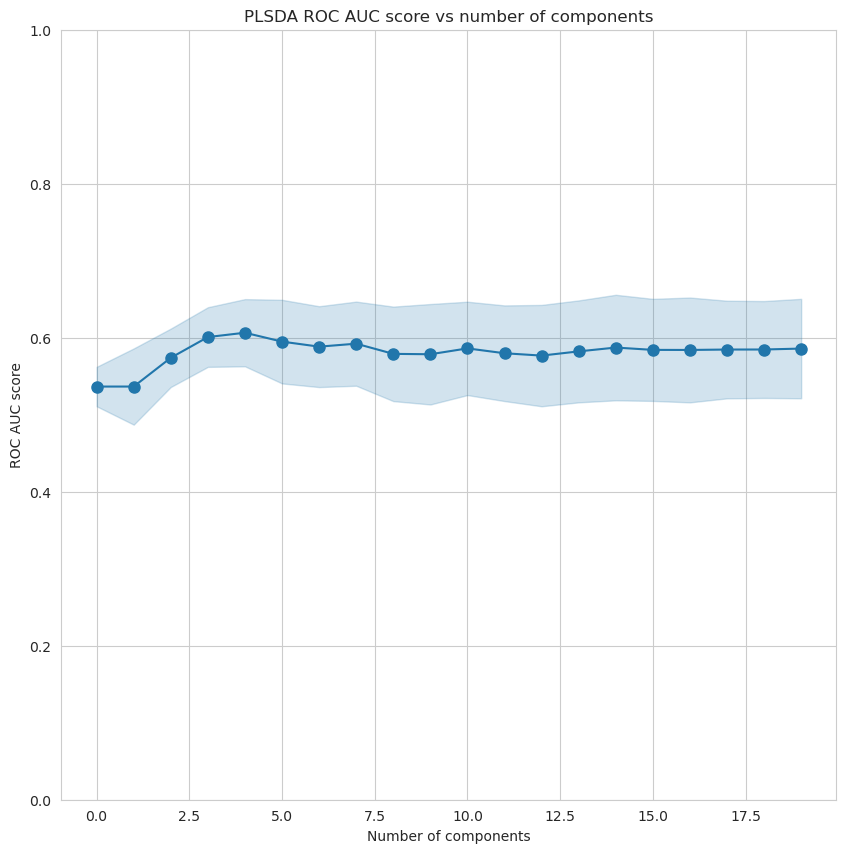

In [13]:
plt.figure(figsize=(10, 10))

# boxplot showing the distribution of the scores using line and markers
plt.plot(components, score_mean, color=palette[0], marker='o', markersize=8)
plt.fill_between(components, score_25, score_75, color=palette[0], alpha=0.2)

# y axis limits
plt.ylim(0, 1.0)
plt.xlabel('Number of components')
plt.ylabel('ROC AUC score')
plt.title('PLSDA ROC AUC score vs number of components')
plt.show()


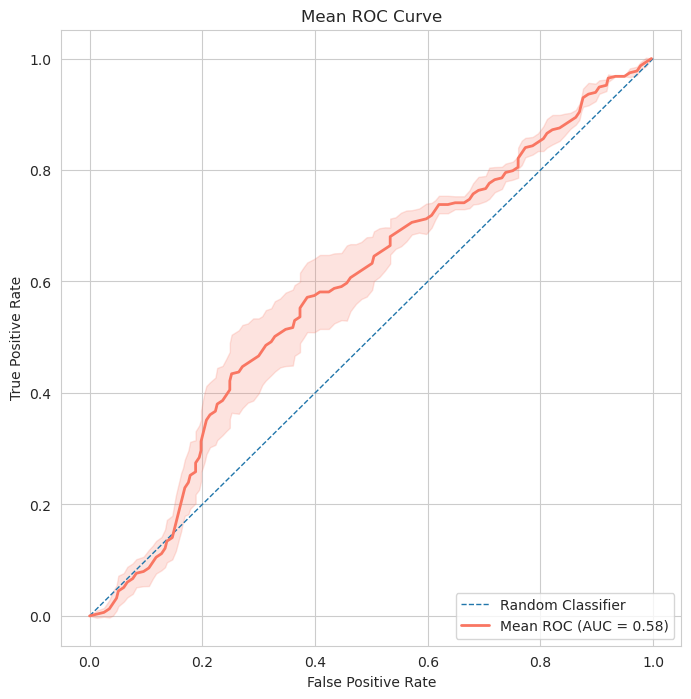

In [14]:
from sklearn.metrics import roc_curve, auc


pls = PLSRegression(n_components=4)

roc_scores = dict()
roc_scores['fpr'] = []
roc_scores['tpr'] = []
roc_scores['roc_auc'] = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    pls = PLSRegression(n_components=i)
    pls.fit(X_train, y_train)
    y_pred = pls.predict(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate=False)
    roc_scores['fpr'].append(fpr)
    roc_scores['tpr'].append(tpr)
    roc_scores['roc_auc'].append(auc(fpr, tpr))

plt.figure(figsize=(8, 8))
# plotting the random line
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', label='Random Classifier')

# Assicurati che tutte le liste di FPR e TPR abbiano la stessa lunghezza
max_length_fpr = min([len(lst) for lst in roc_scores['fpr']])
max_length_tpr = min([len(lst) for lst in roc_scores['tpr']])
roc_scores['fpr'] = [lst[:max_length_fpr] for lst in roc_scores['fpr']]
roc_scores['tpr'] = [lst[:max_length_tpr] for lst in roc_scores['tpr']]

# Calcola la media dei valori di FPR e TPR e l'AUC
mean_fpr = np.mean(roc_scores['fpr'], axis=0)
mean_tpr = np.mean(roc_scores['tpr'], axis=0)
mean_auc = np.mean(roc_scores['roc_auc'])

# Calcola la deviazione standard dei valori di FPR e TPR e l'AUC
std_fpr = np.std(roc_scores['fpr'], axis=0)
std_tpr = np.std(roc_scores['tpr'], axis=0)
std_auc = np.std(roc_scores['roc_auc'])


# Traccia la curva ROC media
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_auc:.2f})', color=palette[1], lw=2)

# Traccia la regione di deviazione standard
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color=palette[1], alpha=0.2)


# Personalizza il grafico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc='lower right')
plt.show()
